In [8]:
import pandas as pd

# List of specific CSV file names with their full paths
csv_files = [
    'v1_review.csv',
    'v2_review.csv',
    'v3_review.csv',
    's1_review.csv',
    's2_review.csv',
    's3_review.csv',
    'g1_review.csv',
    'g2_review.csv',
    'o1_review.csv',
    'o2_review.csv',
    'r1_review.csv',
    'r2_review.csv'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file name and append its DataFrame to the list
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_file = 'all_review.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved as {output_file}")


Merged file saved as all_review.csv


In [9]:
merged_df

,Product ID,Product Name,Price,Review,Rating,One-word Review
0,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹26,999",Super camera quality 😍.\nValue of money..,5,Terrific purchase
1,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹26,999",Just looking like a woow,5,Terrific purchase
2,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹26,999",Mast\nI like it 🤩🤩\nAmazing performance And ba...,5,Brilliant
3,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹26,999",Nice design and looking awesome...camera good ...,5,Brilliant
4,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)","₹26,999",Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...,5,Must buy!
...,...,...,...,...,...,...
1303,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)","₹24,999",So light weight with a good looking phone. But...,5,Awesome
1304,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)","₹24,999","Nice product, good camera, victus protection, ...",5,Best in the market!
1305,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)","₹24,999","Premium design , performance is good , experie...",5,Must buy!
1306,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)","₹24,999",Awesome phone,5,Wonderful


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       1308 non-null   object
 1   Product Name     1308 non-null   object
 2   Price            1308 non-null   object
 3   Review           1308 non-null   object
 4   Rating           1308 non-null   int64 
 5   One-word Review  1308 non-null   object
dtypes: int64(1), object(5)
memory usage: 61.4+ KB


In [12]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load your DataFrame
# Assuming df is already loaded
df=pd.read_csv('all_review.csv')

# 1. **Price Cleaning**: Remove non-numeric characters and convert to float
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# 2. **Review Cleaning**: Remove HTML tags, special characters, numbers, emojis, and convert to lowercase
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)               # Remove HTML tags
    text = re.sub(r'[^\x00-\x7F]+', '', text)       # Remove emojis and non-ASCII characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)         # Remove special characters & numbers
    text = text.lower().strip()                     # Convert to lowercase and trim spaces
    return re.sub(r'\s+', ' ', text)                # Replace multiple spaces with single space

df['Cleaned_Review'] = df['Review'].apply(clean_text)

# 3. **Tokenization, Stopword Removal & Lemmatization**
stop_words = set(stopwords.words('english'))

def tokenize_and_normalize(text):
    doc = nlp(text)
    # Lemmatize, remove stopwords, and keep only alphabetic tokens
    words = [token.lemma_ for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    return ' '.join(words)

df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_and_normalize)

# 4. **Handle Missing Values**: Remove rows with missing reviews, ratings, or price
df.dropna(subset=['Cleaned_Review', 'Rating', 'Price'], inplace=True)

# 5. **Convert Ratings to Numeric (if necessary)**: Ensure all ratings are properly formatted
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# 6. **One-word Review Cleaning (if required)**
df['Cleaned_One_Word_Review'] = df['One-word Review'].apply(clean_text)

# 7. **Save Cleaned Data** (optional)
df.to_csv('D:\CHITRA\AXICON\\new_clean.csv', index=False)
print("Data cleaned and saved!")

# Display the first few rows of cleaned data
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data cleaned and saved!
         Product ID                            Product Name    Price  \
0  MOBH3XHRUQMKBEZX  vivo T3 Pro 5G (Emerald Green, 256 GB)  26999.0   
1  MOBH3XHRUQMKBEZX  vivo T3 Pro 5G (Emerald Green, 256 GB)  26999.0   
2  MOBH3XHRUQMKBEZX  vivo T3 Pro 5G (Emerald Green, 256 GB)  26999.0   
3  MOBH3XHRUQMKBEZX  vivo T3 Pro 5G (Emerald Green, 256 GB)  26999.0   
4  MOBH3XHRUQMKBEZX  vivo T3 Pro 5G (Emerald Green, 256 GB)  26999.0   

                                              Review  Rating  \
0          Super camera quality 😍.\nValue of money..       5   
1                           Just looking like a woow       5   
2  Mast\nI like it 🤩🤩\nAmazing performance And ba...       5   
3  Nice design and looking awesome...camera good ...       5   
4  Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...       5   

     One-word Review                                     Cleaned_Review  \
0  Terrific purchase                super camera quality value of money   
1  Terri

In [13]:
df

,Product ID,Product Name,Price,Review,Rating,One-word Review,Cleaned_Review,Tokenized_Review,Cleaned_One_Word_Review
0,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Super camera quality 😍.\nValue of money..,5,Terrific purchase,super camera quality value of money,super camera quality value money,terrific purchase
1,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Just looking like a woow,5,Terrific purchase,just looking like a woow,look like woow,terrific purchase
2,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Mast\nI like it 🤩🤩\nAmazing performance And ba...,5,Brilliant,mast i like it amazing performance and battery...,mast like amazing performance battery backup g...,brilliant
3,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Nice design and looking awesome...camera good ...,5,Brilliant,nice design and looking awesomecamera good bat...,nice design look awesomecamera good battery pe...,brilliant
4,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...,5,Must buy!,camera battery performance bgmi constant fps g...,camera battery performance bgmi constant fps g...,must buy
...,...,...,...,...,...,...,...,...,...
1303,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,So light weight with a good looking phone. But...,5,Awesome,so light weight with a good looking phone but ...,light weight good look phone problem battery d...,awesome
1304,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Nice product, good camera, victus protection, ...",5,Best in the market!,nice product good camera victus protection exc...,nice product good camera victus protection exc...,best in the market
1305,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Premium design , performance is good , experie...",5,Must buy!,premium design performance is good experience ...,premium design performance good experience goo...,must buy
1306,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,Awesome phone,5,Wonderful,awesome phone,awesome phone,wonderful


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               1308 non-null   object 
 1   Product Name             1308 non-null   object 
 2   Price                    1308 non-null   float64
 3   Review                   1308 non-null   object 
 4   Rating                   1308 non-null   int64  
 5   One-word Review          1308 non-null   object 
 6   Cleaned_Review           1308 non-null   object 
 7   Tokenized_Review         1308 non-null   object 
 8   Cleaned_One_Word_Review  1308 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 92.1+ KB


In [16]:
pd.read_csv('D:\CHITRA\AXICON\\new_clean.csv')

,Product ID,Product Name,Price,Review,Rating,One-word Review,Cleaned_Review,Tokenized_Review,Cleaned_One_Word_Review
0,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Super camera quality 😍.\nValue of money..,5,Terrific purchase,super camera quality value of money,super camera quality value money,terrific purchase
1,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Just looking like a woow,5,Terrific purchase,just looking like a woow,look like woow,terrific purchase
2,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Mast\nI like it 🤩🤩\nAmazing performance And ba...,5,Brilliant,mast i like it amazing performance and battery...,mast like amazing performance battery backup g...,brilliant
3,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Nice design and looking awesome...camera good ...,5,Brilliant,nice design and looking awesomecamera good bat...,nice design look awesomecamera good battery pe...,brilliant
4,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...,5,Must buy!,camera battery performance bgmi constant fps g...,camera battery performance bgmi constant fps g...,must buy
...,...,...,...,...,...,...,...,...,...
1303,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,So light weight with a good looking phone. But...,5,Awesome,so light weight with a good looking phone but ...,light weight good look phone problem battery d...,awesome
1304,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Nice product, good camera, victus protection, ...",5,Best in the market!,nice product good camera victus protection exc...,nice product good camera victus protection exc...,best in the market
1305,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Premium design , performance is good , experie...",5,Must buy!,premium design performance is good experience ...,premium design performance good experience goo...,must buy
1306,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,Awesome phone,5,Wonderful,awesome phone,awesome phone,wonderful


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               1308 non-null   object 
 1   Product Name             1308 non-null   object 
 2   Price                    1308 non-null   float64
 3   Review                   1308 non-null   object 
 4   Rating                   1308 non-null   int64  
 5   One-word Review          1308 non-null   object 
 6   Cleaned_Review           1307 non-null   object 
 7   Tokenized_Review         1305 non-null   object 
 8   Cleaned_One_Word_Review  1308 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 92.1+ KB


In [20]:
df = df.dropna(subset=['Cleaned_Review', 'Tokenized_Review'])
df.to_csv('D:\CHITRA\AXICON\\1.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               1305 non-null   object 
 1   Product Name             1305 non-null   object 
 2   Price                    1305 non-null   float64
 3   Review                   1305 non-null   object 
 4   Rating                   1305 non-null   int64  
 5   One-word Review          1305 non-null   object 
 6   Cleaned_Review           1305 non-null   object 
 7   Tokenized_Review         1305 non-null   object 
 8   Cleaned_One_Word_Review  1305 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 102.0+ KB


In [21]:
pd.read_csv('D:\CHITRA\AXICON\\1.csv')

,Product ID,Product Name,Price,Review,Rating,One-word Review,Cleaned_Review,Tokenized_Review,Cleaned_One_Word_Review
0,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Super camera quality 😍.\nValue of money..,5,Terrific purchase,super camera quality value of money,super camera quality value money,terrific purchase
1,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Just looking like a woow,5,Terrific purchase,just looking like a woow,look like woow,terrific purchase
2,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Mast\nI like it 🤩🤩\nAmazing performance And ba...,5,Brilliant,mast i like it amazing performance and battery...,mast like amazing performance battery backup g...,brilliant
3,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Nice design and looking awesome...camera good ...,5,Brilliant,nice design and looking awesomecamera good bat...,nice design look awesomecamera good battery pe...,brilliant
4,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...,5,Must buy!,camera battery performance bgmi constant fps g...,camera battery performance bgmi constant fps g...,must buy
...,...,...,...,...,...,...,...,...,...
1300,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,So light weight with a good looking phone. But...,5,Awesome,so light weight with a good looking phone but ...,light weight good look phone problem battery d...,awesome
1301,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Nice product, good camera, victus protection, ...",5,Best in the market!,nice product good camera victus protection exc...,nice product good camera victus protection exc...,best in the market
1302,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Premium design , performance is good , experie...",5,Must buy!,premium design performance is good experience ...,premium design performance good experience goo...,must buy
1303,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,Awesome phone,5,Wonderful,awesome phone,awesome phone,wonderful


Sentiment analysis results with TextBlob saved to D:\CHITRA\AXICON\deepak.csv.
                             Product Name  \
0  vivo T3 Pro 5G (Emerald Green, 256 GB)   
1  vivo T3 Pro 5G (Emerald Green, 256 GB)   
2  vivo T3 Pro 5G (Emerald Green, 256 GB)   
3  vivo T3 Pro 5G (Emerald Green, 256 GB)   
4  vivo T3 Pro 5G (Emerald Green, 256 GB)   

                                      Cleaned_Review TextBlob_Sentiment  \
0                super camera quality value of money           Positive   
1                           just looking like a woow            Neutral   
2  mast i like it amazing performance and battery...  Strongly Positive   
3  nice design and looking awesomecamera good bat...  Strongly Positive   
4  camera battery performance bgmi constant fps g...           Positive   

   TextBlob_Sentiment_Score  
0                  0.333333  
1                  0.000000  
2                  0.650000  
3                  0.650000  
4                  0.208571  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23776\3718966767.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel',


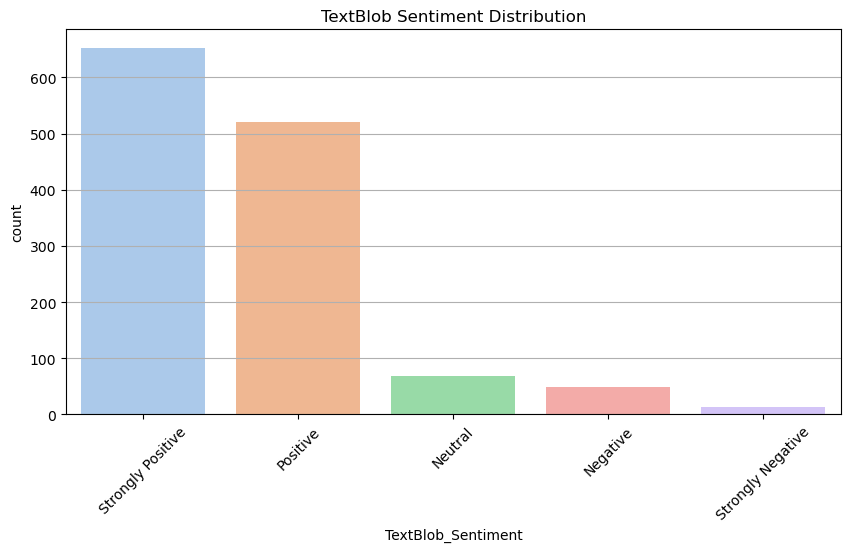

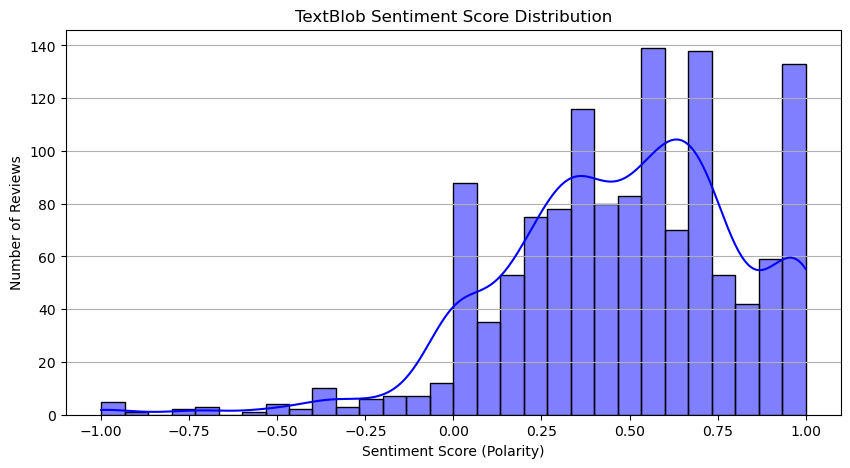

Top 5 Products Based on TextBlob Sentiment Analysis:
                                             avg_textblob_sentiment_score  \
Product Name                                                                
vivo V40 5G (Lotus Purple, 128 GB)                               0.588119   
OnePlus 12R (Iron Gray, 128 GB)                                  0.577240   
vivo T3 Pro 5G (Emerald Green, 256 GB)                           0.570540   
vivo V23 Pro 5G (Stardust Black, 256 GB)                         0.546711   
REDMI Note 13 Pro 5G (Coral Purple, 256 GB)                      0.545370   

                                             total_textblob_positive_reviews  \
Product Name                                                                   
vivo V40 5G (Lotus Purple, 128 GB)                                        31   
OnePlus 12R (Iron Gray, 128 GB)                                           41   
vivo T3 Pro 5G (Emerald Green, 256 GB)                                    35   
vivo V2

In [22]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the preprocessed dataset
file_path = 'D:\CHITRA\AXICON\\1.csv'
df = pd.read_csv(file_path)

# TextBlob Sentiment Analysis Function
def get_textblob_sentiment(text):
    """Determine sentiment polarity using TextBlob."""
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Polarity score (-1 to 1)
    
    # Categorize based on polarity thresholds
    if polarity > 0.5:
        sentiment = 'Strongly Positive'
    elif 0 < polarity <= 0.5:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    elif -0.5 <= polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Strongly Negative'
    
    return polarity, sentiment

# Apply TextBlob sentiment analysis
df['TextBlob_Sentiment_Score'], df['TextBlob_Sentiment'] = zip(*df['Cleaned_Review'].apply(get_textblob_sentiment))

# Save the updated DataFrame with TextBlob sentiment analysis
output_path = 'D:\CHITRA\AXICON\\deepak.csv'
df.to_csv(output_path, index=False)

print(f"Sentiment analysis results with TextBlob saved to {output_path}.")

# Display the first few rows with sentiment analysis
print(df[['Product Name', 'Cleaned_Review', 'TextBlob_Sentiment', 'TextBlob_Sentiment_Score']].head())

# Visualization: TextBlob Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel', 
              order=['Strongly Positive', 'Positive', 'Neutral', 'Negative', 'Strongly Negative'])
plt.title('TextBlob Sentiment Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Histogram of TextBlob Sentiment Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['TextBlob_Sentiment_Score'], bins=30, kde=True, color='blue')
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Polarity)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

# Aggregation: Average Sentiment Score by Product
product_sentiment_summary = df.groupby('Product Name').agg(
    avg_textblob_sentiment_score=('TextBlob_Sentiment_Score', 'mean'),
    total_textblob_positive_reviews=('TextBlob_Sentiment', lambda x: (x == 'Positive').sum()),
    total_reviews=('TextBlob_Sentiment', 'count')  # Using TextBlob_Sentiment for review count
).sort_values(by='avg_textblob_sentiment_score', ascending=False)

# Show the top 5 products based on TextBlob average sentiment score
print("Top 5 Products Based on TextBlob Sentiment Analysis:")
print(product_sentiment_summary.head())


In [24]:
df1=pd.read_csv('D:\CHITRA\AXICON\\deepak.csv')

In [25]:
df1

,Product ID,Product Name,Price,Review,Rating,One-word Review,Cleaned_Review,Tokenized_Review,Cleaned_One_Word_Review,TextBlob_Sentiment_Score,TextBlob_Sentiment
0,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Super camera quality 😍.\nValue of money..,5,Terrific purchase,super camera quality value of money,super camera quality value money,terrific purchase,0.333333,Positive
1,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Just looking like a woow,5,Terrific purchase,just looking like a woow,look like woow,terrific purchase,0.000000,Neutral
2,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Mast\nI like it 🤩🤩\nAmazing performance And ba...,5,Brilliant,mast i like it amazing performance and battery...,mast like amazing performance battery backup g...,brilliant,0.650000,Strongly Positive
3,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Nice design and looking awesome...camera good ...,5,Brilliant,nice design and looking awesomecamera good bat...,nice design look awesomecamera good battery pe...,brilliant,0.650000,Strongly Positive
4,MOBH3XHRUQMKBEZX,"vivo T3 Pro 5G (Emerald Green, 256 GB)",26999.0,Camera 4.5/5\nbattery = 5/5\nperformance = Bgm...,5,Must buy!,camera battery performance bgmi constant fps g...,camera battery performance bgmi constant fps g...,must buy,0.208571,Positive
...,...,...,...,...,...,...,...,...,...,...,...
1300,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,So light weight with a good looking phone. But...,5,Awesome,so light weight with a good looking phone but ...,light weight good look phone problem battery d...,awesome,0.343750,Positive
1301,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Nice product, good camera, victus protection, ...",5,Best in the market!,nice product good camera victus protection exc...,nice product good camera victus protection exc...,best in the market,0.766667,Strongly Positive
1302,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,"Premium design , performance is good , experie...",5,Must buy!,premium design performance is good experience ...,premium design performance good experience goo...,must buy,0.625000,Strongly Positive
1303,MOBGWFHFAFBPDZHG,"REDMI Note 13 Pro 5G (Coral Purple, 256 GB)",24999.0,Awesome phone,5,Wonderful,awesome phone,awesome phone,wonderful,1.000000,Strongly Positive


In [26]:
df1.columns

Index(['Product ID', 'Product Name', 'Price', 'Review', 'Rating',
       'One-word Review', 'Cleaned_Review', 'Tokenized_Review',
       'Cleaned_One_Word_Review', 'TextBlob_Sentiment_Score',
       'TextBlob_Sentiment'],
      dtype='object')